In [3]:
## Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("medical_cost_insurance.csv")

In [5]:
# checking the dataframe

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
918,61,female,28.200,0,no,southwest,13041.92100
877,33,male,33.440,5,no,southeast,6653.78860
811,33,female,42.940,3,no,northwest,6360.99360
682,39,male,35.300,2,yes,southwest,40103.89000
46,18,female,38.665,2,no,northeast,3393.35635
727,29,female,21.755,1,yes,northeast,16657.71745
349,19,male,27.835,0,no,northwest,1635.73365
405,52,female,38.380,2,no,northeast,11396.90020
484,48,male,34.300,3,no,southwest,9563.02900
1304,42,male,24.605,2,yes,northeast,21259.37795


In [8]:
df.shape

(1338, 7)

so from above observation, we can see there is 1338 rows and 7 columns including 1 target

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


=============================================================
From above observation we can clearly see that there is no null values, datatype for each independent variable

>Numerical data :
    Age       - integer
    BMI       - float
    Children  - integer
    
>Categorical Data:
    sex       
    smoker
    region

>Target column is numeric - float

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


==============================================================
As data is mixture of categorical and numerical,  we will look descriptive statistical for continuous data

# EDA (Exploratory Data Analysis process)

In [11]:
# checking the sum value of null value, as we already see from the data info there is no null
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Visualize the relatinoship between age and charges

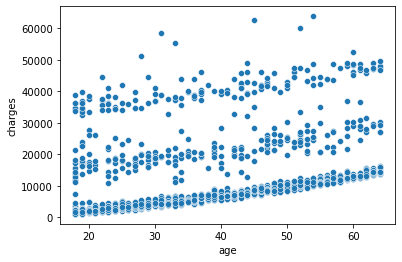

In [22]:
# Univariate analysis for each independant variable
# fig = plt.figure(figsize = (10,6))
# sns.barplot(x="age",y="charges",data=df,ci=None)
# plt.xlabel ("Age", size=12)
# plt.ylabel ("Charges ($)",size=12)
sns.scatterplot(data=df,x="age",y="charges")
plt.show()
            

===============================================================
from above observation we can see that when age age increase premium charge increase too.

# Visualise the "Sex" varible 

male      676
female    662
Name: sex, dtype: int64


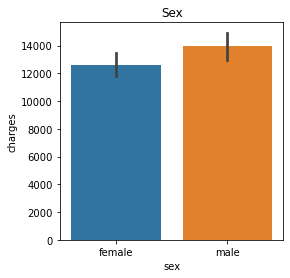

In [34]:
print(df["sex"].value_counts())
plt.figure(figsize=(4,4))
sns.barplot(x="sex",y="charges",data=df)
plt.title("Sex")
plt.show()

From above Graph observation, we can see there are equal size of male and female.
Also the cost of the insurance for male female has very not big difference

# Visualise the BMI variable

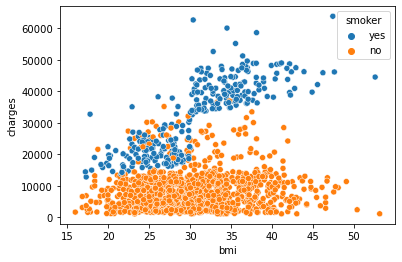

In [35]:
sns.scatterplot(data=df,x="bmi",y="charges",hue="smoker")
plt.show()

Scatter plot alon for BMI vs charges do not make any sence but with addtion the smoking habit,it show brief information.
> when BMI increase and is smoker then cost of insurance increase   too

> when BMI increase but non smoker then cost of inurance remain same regardless of the BMI level

# Visualise the Gender variable

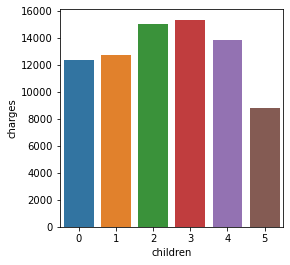

In [37]:
plt.figure(figsize=(4,4))
sns.barplot(x="children",y="charges",data=df,ci=None)
plt.show()

Above observation shows that when up 3 children price of insurance cost goes up , but when there are more children then cost of insurance goes down.

no     1064
yes     274
Name: smoker, dtype: int64


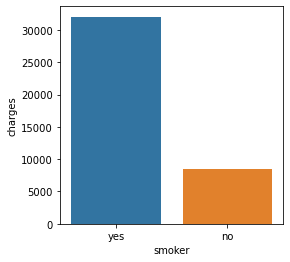

In [43]:
print(df["smoker"].value_counts())
plt.figure(figsize=(4,4))
sns.barplot(x="smoker",y="charges",data=df,ci=None)
plt.show()

From above graph observation we can see that with smoking habit has high risk of life threathing disease so their insurance cost is too high compare to the non smoker

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


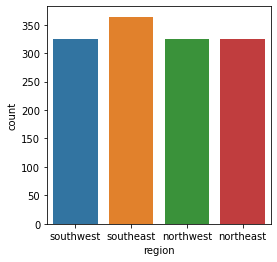

In [45]:
print(df["region"].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x="region",data=df)
plt.show()

From the observation, number of client from each region are same apart from southeast which is slightly high compare to other three.

# Checking the distribution of the continous Data

<Figure size 720x432 with 0 Axes>

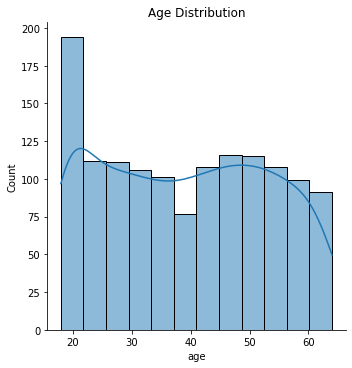

In [49]:
plt.figure(figsize=(10,6))
sns.displot(df["age"],kde=True)
plt.title("Age Distribution")
plt.show()

Age graph show the normal distribution apart from big bar on age 20

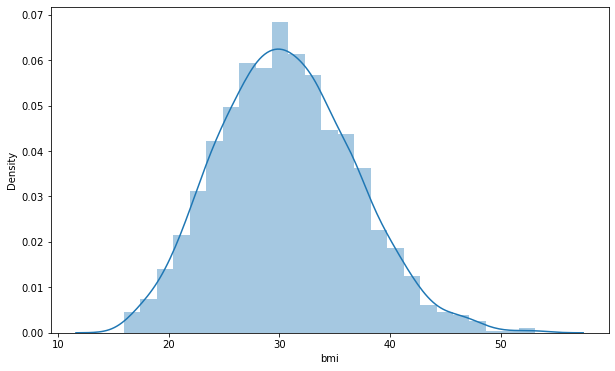

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(df["bmi"],kde=True)
plt.show()

BMI Scatter plot show it is normal distribution.

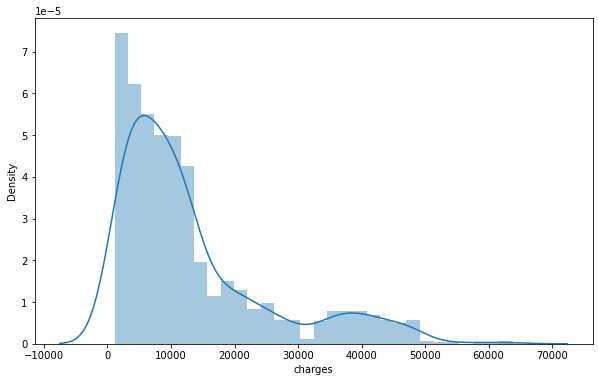

In [51]:
plt.figure(figsize=(10,6))
sns.distplot(df["charges"],kde=True)
plt.show()

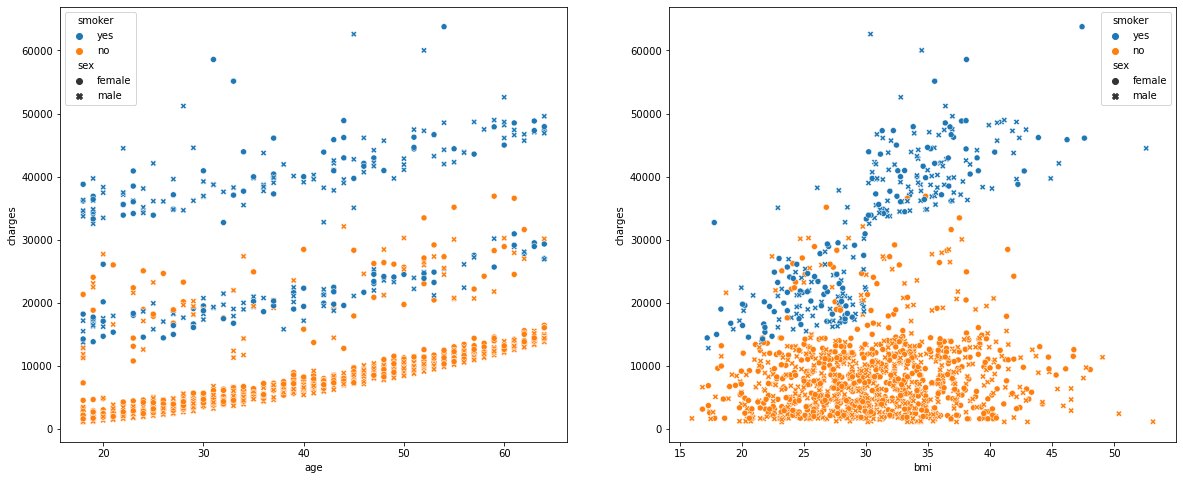

In [55]:
# multivariate analysis for continous data
clms= ["age","bmi"]

plt.subplots(figsize=(20,8))
for i, col in  enumerate(clms):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y="charges",hue="smoker",style="sex")
plt.show()

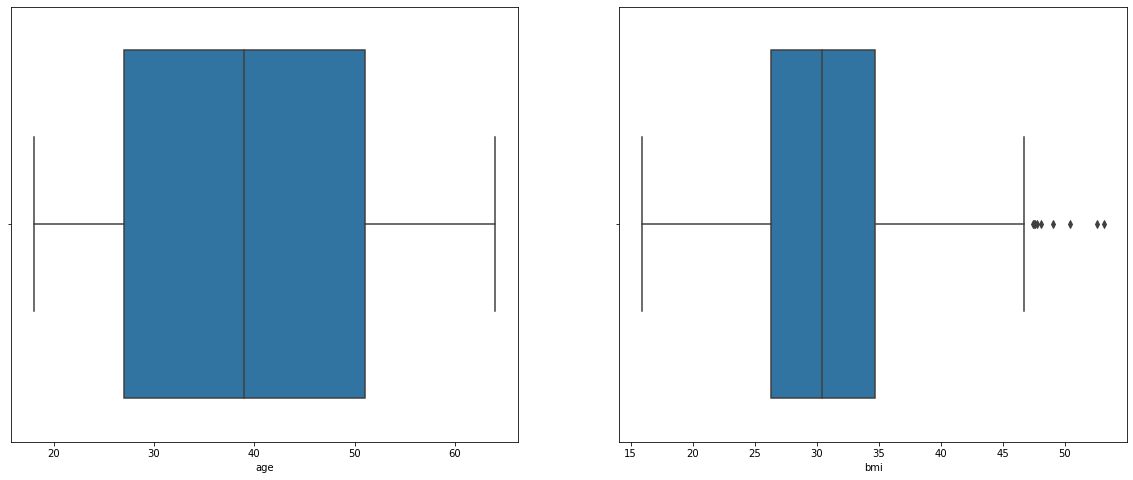

In [57]:
# checking the box plot for age and BMI
plt.subplots(figsize=(20,8))
for i, col in enumerate(clms):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])
plt.show()

Above observation we can see the outliers in BMI variable column. As we can clearly see that most of the data fall between 26 to 35.

# Removing outlier with zscore and create newdf without outliers

In [112]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df["bmi"]))
threshold=3
np.where(z>3)

(array([ 116,  847, 1047, 1317], dtype=int64),)

In [113]:
newdf = df[np.abs(zscore(df["bmi"]))<3]

In [114]:
print(newdf.shape)

(1334, 7)


# Lable Encoding to the categorical columns

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdf["sex"] = le.fit_transform(newdf["sex"])
newdf["smoker"]=le.fit_transform(newdf["smoker"])
newdf["region"]= le.fit_transform(newdf["region"])
    

In [116]:
newdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# corelation check

<AxesSubplot:>

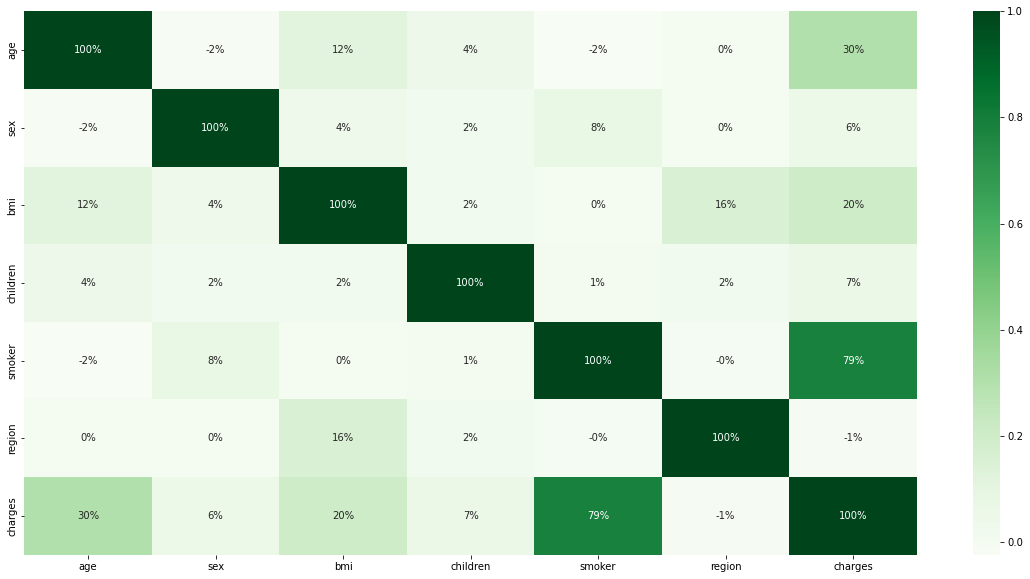

In [117]:
plt.figure(figsize=(20,10))
sns.heatmap(newdf.corr(),annot=True,fmt=".0%",cmap="Greens")

From Graph observation :
    . there is strong poistive correlation between smokers and charges
    . there is weak correlation between age and charges
    . there is week correlation between bmi and charges
    . Sex and region provide very minimum value of correlation to charges
    
>so we can remove the sex and region column

In [118]:
newdf.drop(["sex","region"],axis=1,inplace=True)

In [119]:
newdf.shape

(1334, 5)

# Now split the Data into Training and Test Date Sets

In [120]:
x = newdf.drop("charges",axis=1)
y = newdf["charges"]
print(x.head())
print(y.head())

   age     bmi  children  smoker
0   19  27.900         0       1
1   18  33.770         1       0
2   28  33.000         3       0
3   33  22.705         0       0
4   32  28.880         0       0
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [121]:
print(x.shape,y.shape)

(1334, 4) (1334,)


shape is same after removing outlier and splitting the data into features and target variable

# Importing libary for scaling and model

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# We will fit the data into training data and testing data

In [135]:
maxr2s=0
maxrs=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    accr2s = r2_score(y_test,pred_test)
#     print(f"Random State = {i}")
#     print(f"Training Accuracy is : - {r2_score(y_train,pred_train)}")
#     print(f"Testing Accuracy is : - {r2_score(y_test,pred_test)}")
#     print("Differnce is : ",(r2_score(y_train,pred_train)-(r2_score(y_test,pred_test))))
#     print("\n")
    
    if accr2s > maxr2s:
        maxr2s = accr2s
        maxrs = i
        print(f"Training Accuracy is : {r2_score(y_train,pred_train)}")
        print("max R2 Score ",maxr2s, "max Random State",i)
        print("Differnce is : ",(r2_score(y_train,pred_train)-(r2_score(y_test,pred_test))))
        print("\n")
    

Training Accuracy is : 0.7507012273830672
max R2 Score  0.744232744525236 max Random State 0
Differnce is :  0.006468482857831193


Training Accuracy is : 0.7458017622103923
max R2 Score  0.7636817347111892 max Random State 1
Differnce is :  -0.01787997250079687


Training Accuracy is : 0.7454700431636969
max R2 Score  0.765302404715873 max Random State 7
Differnce is :  -0.019832361552176048


Training Accuracy is : 0.7436290425343028
max R2 Score  0.7732299262985827 max Random State 11
Differnce is :  -0.02960088376427983


Training Accuracy is : 0.7405810260494645
max R2 Score  0.7827994813448741 max Random State 12
Differnce is :  -0.042218455295409574


Training Accuracy is : 0.7372453244566821
max R2 Score  0.7932488340537406 max Random State 19
Differnce is :  -0.056003509597058465


Training Accuracy is : 0.7348139414497603
max R2 Score  0.7944190983320609 max Random State 51
Differnce is :  -0.059605156882300614


Training Accuracy is : 0.7336381153782174
max R2 Score  0.80348

# Random State = 0 as lowest differnce between the Train accuracy, test accuracy

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test=lr.predict(x_test)
accr2s = r2_score(y_test,pred_test)
print("Linear Regression :",accr2s)

Linear Regression : 0.744232744525236


Validatig the model performation with Cross validation

In [144]:
test_accur =r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At Cross fold {j} the cv score is {cv_mean} and accuracy score is {test_accur}")
    print("Difference is :",test_accur-cv_mean)
    print("\n")      

At Cross fold 2 the cv score is 0.7478174465908844 and accuracy score is 0.744232744525236
Difference is : -0.0035847020656484263


At Cross fold 3 the cv score is 0.7479360110329955 and accuracy score is 0.744232744525236
Difference is : -0.0037032665077594284


At Cross fold 4 the cv score is 0.7456791442790124 and accuracy score is 0.744232744525236
Difference is : -0.0014463997537763618


At Cross fold 5 the cv score is 0.7467406815994837 and accuracy score is 0.744232744525236
Difference is : -0.002507937074247679


At Cross fold 6 the cv score is 0.7468929762833074 and accuracy score is 0.744232744525236
Difference is : -0.0026602317580713963


At Cross fold 7 the cv score is 0.744899393921278 and accuracy score is 0.744232744525236
Difference is : -0.0006666493960419961


At Cross fold 8 the cv score is 0.7430475869355652 and accuracy score is 0.744232744525236
Difference is : 0.00118515758967086


At Cross fold 9 the cv score is 0.7445533612161449 and accuracy score is 0.744232

cross val score 9 has lowest differnce in cross score vs Testing accuracy score

In [167]:
# importing more models to test
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [185]:
from sklearn.model_selection import cross_val_score
linr = LinearRegression()
RFR = RandomForestRegressor()
ada = AdaBoostRegressor()
lss = Lasso()
ridg = Ridge()

print(" Random Forest Regressor Model ")
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
rfr_r2s = r2_score(y_test,pred_RFR)
print("RFR Accuracy Score :",rfr_r2s)
cross_score = cross_val_score(RFR,x,y,cv=9)
cross_mean=cross_score.mean()
print("RFR Cross Val Score is : ", cross_mean)
print("Difference :",rfr_r2s - cross_mean)
print("=========================================")
print("\n")

print(" AdaBoost Regressor ")
ada.fit(x_train,y_train)
pred_ada = ada.predict(x_test)
ada_r2s = r2_score(y_test,pred_ada)
print("ADA Accuracy Score :",ada_r2s)
cross_score = cross_val_score(ada,x,y,cv=9)
cross_mean=cross_score.mean()
print("ADA Cross Val Score is : ", cross_mean)
print("Difference :",ada_r2s - cross_mean)
print("=========================================")
print("\n")


print(" LinearRegression ")
linr.fit(x_train,y_train)
pred_linr = linr.predict(x_test)
linr_r2s = r2_score(y_test,pred_linr)
print("Linear Accuracy Score :",linr_r2s)

cross_score = cross_val_score(linr,x,y,cv=9)
cross_mean=cross_score.mean()
print("Linear Cross Val Score is : ", cross_mean)
print("Difference :",linr_r2s - cross_mean)
print("=========================================")
print("\n")

print(" Lasso ")
lss.fit(x_train,y_train)
pred_lss = lss.predict(x_test)
lss_r2s = r2_score(y_test,pred_lss)
print("Lasso Accuracy Score :",lss_r2s)
cross_score = cross_val_score(lss,x,y,cv=9)
cross_mean= cross_score.mean()
print("Lasso Cross Val Score is : ", cross_mean)
print("Difference :",lss_r2s - cross_mean)
print("=========================================")
print("\n")

print(" Ridge ")
ridg.fit(x_test,y_test)
pred_ridg = ridg.predict(x_test)
ridg_r2s = r2_score(y_test,pred_ridg)
print("Ridge Accuracy Score :",ridg_r2s)
cross_score = cross_val_score(ridg,x,y,cv=9)
cross_mean = cross_score.mean()
print("Ridge Cross Val Score is : ", cross_mean)
print("Difference :",ridg_r2s - cross_mean)
print("=========================================")
print("\n")



 Random Forest Regressor Model 
RFR Accuracy Score : 0.8524152495201687
RFR Cross Val Score is :  0.8235999379044946
Difference : 0.028815311615674077


 AdaBoost Regressor 
ADA Accuracy Score : 0.8143948978584664
ADA Cross Val Score is :  0.8234695174928683
Difference : -0.009074619634401926


 LinearRegression 
Linear Accuracy Score : 0.744232744525236
Linear Cross Val Score is :  0.7445533612161449
Difference : -0.00032061669090888145


 Lasso 
Lasso Accuracy Score : 0.7442387344547443
Lasso Cross Val Score is :  0.7445548483570592
Difference : -0.0003161139023148962


 Ridge 
Ridge Accuracy Score : 0.7485156529777874
Ridge Cross Val Score is :  0.7445717745734441
Difference : 0.003943878404343293




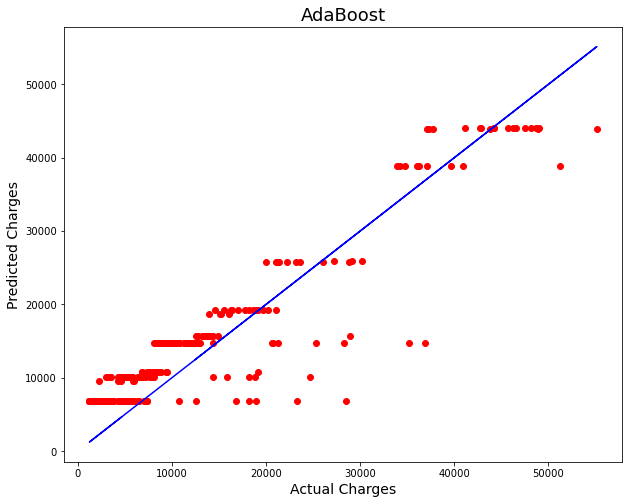

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=pred_ada,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Charges",fontsize=14)
plt.ylabel("Predicted Charges",fontsize = 14)
plt.title("AdaBoost",fontsize = 18)
plt.show()

from above all the model testing, suitable model is AdaBoost with good R2 score and Cross Val score too.


# Regularization

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [191]:
from sklearn.ensemble import AdaBoostRegressor

In [195]:
parameters = {'n_estimators': [50, 100],
             'learning_rate' : [0.01, 0.05, 0.1, 0.5],
             'loss' : ['linear', 'square', 'exponential']}
ada=AdaBoostRegressor()
clf = GridSearchCV(ada,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}


# Final Model Training with parameters

In [198]:
ada = AdaBoostRegressor(learning_rate=0.01,loss="exponential",n_estimators=50)
ada.fit(x_train,y_train)
ada_score_training = ada.score(x_train,y_train)
ada_pred=ada.predict(x_test)

print("====Ada Boost Model====")
print("Traing Score : ",ada_score_training*100)

ada_r2s = r2_score(y_test,ada_pred)
print("Testing Score : ",ada_r2s*100)

cross_score = cross_val_score(ada,x,y,cv=9)
cross_mean = cross_score.mean()
print("Cross Val Scoree : ",cross_mean*100)


====Ada Boost Model====
Traing Score :  86.19666193682116
Testing Score :  85.19541999952047
Cross Val Scoree :  84.70244615440473


# checking one more high accuracy model Random foreget with hyper parameters

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {"criterion":["mse","mae"],
             "max_features":["auto","sqrt","log2"]}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [201]:
rf = RandomForestRegressor(criterion ="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf_train_score = rf.score(x_train,y_train)
rf_pred = rf.predict(x_test)
print("====Random Forest Model===")
print("Trainig Score :",rf_train_score*100)

rf_r2s =r2_score(y_test,rf_pred)
print("Testing score :",rf_r2s*100)

cross_score = cross_val_score(rf,x,y,cv=9)
cross_mean= cross_score.mean()
print("Cross Val score :",cross_mean*100)

====Random Forest Model===
Trainig Score : 96.85431685073542
Testing score : 85.2474580353495
Cross Val score : 83.5514496602118


# from above hyperparameter testing we will make a decision to select adabost as final model and save the final model

In [208]:
import pickle
filename = "Medical_Insurance_cost.pkl"
pickle.dump(ada,open(filename,"wb"))

Loading the model and testing

In [209]:
Ada = pickle.load(open("Medical_Insurance_cost.pkl","rb"))
result = Ada.score(x_train,y_train)
print(result*100)

86.19666193682116


## End of Project